In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [13]:
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [16]:
# split the data into training and testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# split the targets into training and testing tests
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [23]:
# train the model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)
print(f'Coeficients {regr.coef_}')
print('Mean squared error: %.2f' %mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Coeficient of determination: %.2f' %r2_score(diabetes_y_test, diabetes_y_pred))

Coeficients [938.23786125]
Mean squared error: 2548.07
Coeficient of determination: 0.47


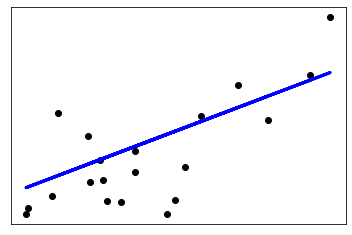

In [24]:
# plot subplots
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
diabetes_X.shape

(442, 1)

In [34]:
ds_X, ds_y = datasets.load_diabetes(return_X_y=True)

In [35]:
# Non negative least squares
n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# threshold coeficients to render then non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# add some noise 
y += 5 * np.random.normal(size=(n_samples, ))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [38]:
# fit the non negative least squares

reg_nnls = linear_model.LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNL R2 score,", r2_score_nnls)

TypeError: __init__() got an unexpected keyword argument 'positive'

In [39]:
# fit OLS
reg_ols = linear_model.LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 Score", r2_score_ols)

OLS R2 Score 0.7718620033025512
